En coordenadas cartesianas, las ecuaciones que describen la trayectoria de un cuerpo en presencia de una fuerza central son las siguientes:

$$ x'' = -\dfrac{GM}{r^3}x = S_x(x,y) $$
$$ y'' = -\dfrac{GM}{r^3}y = S_y(x,y) $$

en donde $r^2 = x^2 + y^2$, $G$ es la constante de gravitación universal y $M$ la masa del cuerpo grandote, tan grandote que produce el campo de fuerzas y el centro de masa está practicamente en su posición. Para la resolución numérica de estas ecuaciones hay que establcer las condiciones al tiempo $t=0$:

Posiciones iniciales: $x(0) = x_0$, $y(0) = 0$

Velocidades iniciales: $x'(0) = 0$, $y'(0) = y'_0$

Además de estos datos hay que determinar los valores de $G$ y $M$

Consideremos el siguiente cambio de variable

$$ \tilde{t} = \sqrt{\dfrac{GM}{r_0^3}}t \qquad x = r_0\tilde{x}; \qquad y = r_0\tilde{y} $$

Tenemos así un nuevo sistema 

$$ \tilde{x}'' = -\dfrac{\tilde{x}}{\tilde{r}^3} = S_x(\tilde{x},\tilde{y}) $$
$$ \tilde{y}'' = -\dfrac{\tilde{y}}{\tilde{r}^3} = S_y(\tilde{x},\tilde{y}) $$

que, para ser resuelto requiere de las siguientes condiciones iniciales:

Posiciones iniciales: $\tilde{x}(0) = 1$, $\tilde{y}(0) = 0$

Velocidades iniciales: $\tilde{x}'(0) = 0$, $\tilde{y}'(0) = \sqrt{\dfrac{r_0}{GM}}y'_0$

Este último es el sistema que vamos a resolver.

Para calcular el tiempo final tomaré un periordo de un año en segundos y aplicaré la ecuación de cambio de variable temporal. Para la velocidad inicial consideraré que la tierra se traslada aproximadamente a $30$ $km$ por segundo.

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

#------------------------------------------------#
#---Parámetros físicos y condiciones iniciales---#
#------------------------------------------------#
G = 6.674 * 10**(-11) # Constante de Gravitación Universal
M = 1.989 * 10**30 # La masota del cuerpo grandote. Masa del sol
p0 = 1.496*10**(11) # Posición inicial física. Que coincide con x_0. Una unidad astronómica.
v0 = 30000 # Velocidad inicial

# Tiempo final considerando 365 días
print("Tiempo FInal aproximado: ", sqrt((G*M)/p0**3)*(3.154*10**(7)))
print("Velocidad Inicial: ", sqrt(p0/(G*M))*v0)

Tiempo FInal aproximado:  6.280219042890066
Velocidad Inicial:  1.007109189498877


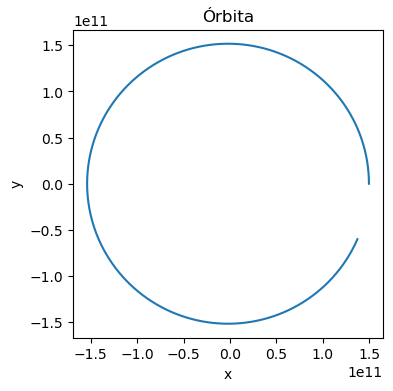

In [4]:
#--------------------------------------------#
#---Las Ecuaciones y sus Valores Iniciales---#
#--------------------------------------------#

def S_x(x,y):
    r = sqrt(x**2+y**2)
    return -x/(r**3)

def S_y(x,y):
    r = sqrt(x**2+y**2)
    return -y/(r**3)

# Posiciones iniciales al tiempo inicial
t0 = 0.0
x0 = 1.0
y0 = 0.0

# Velocidades iniciales
vx0 = 0.0
vy0 = sqrt(p0/(G*M))*v0 # Aproximadamente igual a 1

#-------------#
#---Dominio---#
#-------------#

tf = 6 # Duración de la solución
h = 0.01
N = int(tf/h) # Número de pasos temporales

Tiempo = [t0]
X = [x0]
Y = [y0]

# Esto es un elemento del algoritmo de Verlet
x_1 = x0 - h*vx0 + 0.5*h**2 * S_x(x0,y0)
y_1 = y0 - h*vy0 + 0.5*h**2 * S_y(x0,y0)

for n in range(N+1):
    t = t0 + n*h
    x1 = 2*x0 - x_1 + h**2*S_x(x0,y0)
    y1 = 2*y0 - y_1 + h**2*S_y(x0,y0)
    Tiempo.append(t)
    X.append(x1)
    Y.append(y1)
    x_1 = x0
    y_1 = y0
    x0 = x1
    y0 = y1

X_real = [p0*i for i in X]
Y_real = [p0*i for i in Y]

plt.figure(figsize=(4, 4))
plt.plot(X_real,Y_real)

# Agregar etiquetas a los ejes
plt.xlabel('x')
plt.ylabel("y")

# Agregar un título a la gráfica
plt.title('Órbita')
plt.show()